## An Exploration of UN data
In this project, you'll be doing some exploratory analysis on two country-level metrics, gross domestic product (GDP) per capita and overall life expectancy. After completing the guided practice section, you will have a chance to find some additional data and do some more exploring of your own.

### Guided Practice:
 1.	Download the Gross Domestic Product (GDP) per capita dataset from [http://data.un.org/Data.aspx?d=WDI&f=Indicator_Code%3aNY.GDP.PCAP.PP.KD](http://data.un.org/Data.aspx?d=WDI&f=Indicator_Code%3aNY.GDP.PCAP.PP.KD). Rename it to gdp_per_capita.csv and place it in the `data` folder of your project repository.

2. Create a Jupyter Notebook in the `notebooks` folder and name it `UN_Data_Exploration`.
    *  You are likely to get errors along the way. When you do, read the errors to try to understand what is happening and how to correct it.
    * Use markdown cells to record your answers to any questions asked in this exercise. On the menu bar, you can toggle the cell type from 'Code' to 'Markdown'. [Here](https://www.markdownguide.org/cheat-sheet/) is a link to a cheat sheet showing the basics of styling text using Markdown.

3.	In the first cell of your notebook, import the required packages with their customary aliases as follows:

    `import pandas as pd`   
    `import numpy as np`  
    `import matplotlib.pyplot as plt`  
    `import seaborn as sns`
    
    Keep all imports in this cell at the top of your notebook.

In [49]:
# had to reset the path to the current directory, hope that I dont have to do this again
# import os 
# print(os.getcwd())

In [50]:
# more reseting path
# os.chdir('c:\\Users\\blond\\Documents\\NssProjects\\un-exploration-vickitaylor\\notebooks')

In [51]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

4.	Using the pandas `read_csv()` function, read the GDP dataset into your notebook as a DataFrame called `gdp_df`. After reading it in, inspect the first 10 rows and then inspect the last 10 rows. 


In [52]:
continents = pd.read_csv('../data/continents.csv')
gdp_df = pd.read_csv('../data/gdp_per_capita.csv')

In [53]:
gdp_df.head(10)

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2021,1517.016266,NaN
1,Afghanistan,2020,1968.341002,NaN
2,Afghanistan,2019,2079.921861,NaN
3,Afghanistan,2018,2060.698973,NaN
4,Afghanistan,2017,2096.093111,NaN
5,Afghanistan,2016,2101.422187,NaN
6,Afghanistan,2015,2108.714173,NaN
7,Afghanistan,2014,2144.449634,NaN
8,Afghanistan,2013,2165.340915,NaN
9,Afghanistan,2012,2122.830759,NaN


In [54]:
gdp_df.tail(10)

,Country or Area,Year,Value,Value Footnotes
7652,Zimbabwe,1999,2866.032886,NaN
7653,Zimbabwe,1998,2931.725144,NaN
7654,Zimbabwe,1997,2896.147308,NaN
7655,Zimbabwe,1996,2867.026043,NaN
7656,Zimbabwe,1995,2641.378271,NaN
7657,Zimbabwe,1994,2670.106615,NaN
7658,Zimbabwe,1993,2458.783255,NaN
7659,Zimbabwe,1992,2468.278257,NaN
7660,Zimbabwe,1991,2781.787843,NaN
7661,Zimbabwe,1990,2704.757299,NaN


In [164]:
gdp_df.sample(10)
# pulls a random sample of rows from the dataframe

,Country,Year,GDP_Per_Capita,Continent
3802,New Zealand,2016,41628.399913,Oceania
2454,Iraq,1998,6822.681016,Asia
3095,Luxembourg,1995,80379.127629,Europe
1531,Ecuador,2008,10284.954266,South America
5791,Vanuatu,1996,2879.028977,Oceania
915,Cabo Verde,2012,6766.942931,Africa
3612,Mozambique,2022,1243.073638,Africa
1396,Dem. Rep. Congo,2001,691.709145,Africa
2475,Ireland,2010,53651.907992,Europe
3208,Malaysia,2014,23328.340922,Asia


5. Drop the 'Value Footnotes' column, and rename the remaining columns to 'Country', 'Year', and 'GDP_Per_Capita'.


In [55]:
gdp_df = gdp_df.drop(columns = 'Value Footnotes')
# tip dont assign to the same variable prior to inspection and making sure the code works as expected

In [56]:
gdp_df = gdp_df.rename(columns={'Country or Area' : 'Country', 'Value' : 'GDP_Per_Capita'})
# renaming the columns to something more manageable, done in a dictionary format, if it does not need to change it does not need to be included in the dictionary


In [ ]:
# reformatted to make into one action, chaining the drop and rename, could also do it with the read csv call. 
# it would not be like this starting out but the steps could be consolidated down after knowing it is ok to do so, one import and columns cleaned up 
# hopefully it is commented out so will not run
'''
gdp_df_exp = (
    pd.read_csv('../data/gdp_per_capita.csv')
    .drop(columns = ['Value Footnotes'])
    .rename(columns = {'Country or Area': 'Country', 'Value': 'GDP_Per_Capita'})
)
'''


In [57]:
gdp_df.head()
# checking to see if dropping and renaming worked

,Country,Year,GDP_Per_Capita
0,Afghanistan,2021,1517.016266
1,Afghanistan,2020,1968.341002
2,Afghanistan,2019,2079.921861
3,Afghanistan,2018,2060.698973
4,Afghanistan,2017,2096.093111


when writing it is ok to check the results but going back dont need the .head() columns or in a seperate cell, so they could be condensed down

6. How many rows and columns does gdp_df have? What are the data types of its columns? If any of the columns are not the expected types, figure out why and fix it.

- rows: 7662
- columns: 3 (not including the index(not sure if that is counted))
- data types: country - object, year - int64, gdp_per_capita - float64
- changed year to a object (did not have issues with it in an int in anaconda, but when using vs code had major issues with it being a int and not a object).
- so really none of the data types needed to be chagned, but I did have issues when changing to vs code with the year


In [58]:
gdp_df.shape
# trying different ways to get columns and rows
# this gives rows, columns

(7662, 3)

In [59]:
gdp_df.shape[0]
# gives rows

7662

In [60]:
gdp_df.shape[1]
# gives columns

3

In [61]:
gdp_df.info()
# gives more inforamtion than just using df.types()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7662 entries, 0 to 7661
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country         7662 non-null   object 
 1   Year            7662 non-null   int64  
 2   GDP_Per_Capita  7662 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 179.7+ KB


In [62]:
gdp_df.count()
# number of values? in each columns?

Country           7662
Year              7662
GDP_Per_Capita    7662
dtype: int64

In [63]:
len(gdp_df.index)
# number of rows ?

7662

In [64]:
len(gdp_df.axes[0])
# gives the rows

7662

In [65]:
# gives the columns 
len(gdp_df.axes[1])

3

In [66]:
len(gdp_df)
# rows

7662

In [67]:
len(gdp_df.columns)
# columns

3

In [68]:
gdp_df.size
# not what I am looking for

22986

In [69]:
# changing year to a string
gdp_df['Year'] = gdp_df['Year'].astype(str)

7. Which years are represented in this dataset? Take a look at the number of observations per year. What do you notice?

   - the number of observations per year were increasing until 2013 where it stays the same till 2020, then decreases in 2021 to 241, and again in 2022 to 232. 


In [70]:
gdp_df['Year'].unique()

array(['2021', '2020', '2019', '2018', '2017', '2016', '2015', '2014',
       '2013', '2012', '2011', '2010', '2009', '2008', '2007', '2006',
       '2005', '2004', '2003', '2002', '2022', '2001', '2000', '1999',
       '1998', '1997', '1996', '1995', '1994', '1993', '1992', '1991',
       '1990'], dtype=object)

In [71]:
gdp_df['Year'].min()

'1990'

In [72]:
gdp_df['Year'].max()

'2022'

In [73]:
gdp_df['Year'].value_counts(ascending = True) 
# value counts sorts by the count. it is not in order by year. to sort by year, could you sort_index()

Year
1990    207
1991    208
1992    210
1993    211
1994    213
1995    223
1996    223
1997    226
1998    226
1999    227
2022    232
2000    233
2001    234
2002    235
2003    235
2004    236
2005    236
2007    237
2006    237
2008    238
2009    239
2010    239
2011    240
2012    240
2021    241
2013    242
2014    242
2015    242
2016    242
2017    242
2018    242
2019    242
2020    242
Name: count, dtype: int64

In [165]:
gdp_df['Year'].value_counts().sort_index()
# this isnt the same as above result due to the dataframe changing in cells further down

Year
1990    157
1991    158
1992    160
1993    161
1994    163
1995    173
1996    173
1997    175
1998    175
1999    176
2000    180
2001    180
2002    181
2003    181
2004    182
2005    182
2006    183
2007    183
2008    184
2009    184
2010    184
2011    184
2012    184
2013    186
2014    186
2015    186
2016    186
2017    186
2018    186
2019    186
2020    186
2021    185
2022    177
Name: count, dtype: int64

8. How many countries are represented in this dataset? Which countries are least represented in the dataset? Why do you think these countries have so few observations?

 - Do you have to be in the UN to be reporting this? Were these countries in the UN at that time of the reporting? 
 - Some of these are grouped by area and not country, were they too small to be reported by themselfs in some years and then they are grouped into the area.
 - Some of the places listed are cities, and geographical areas, and not countries


older versions of pandas were only objects, you could change to a string, but not needed

In [74]:
gdp_df['Country'].unique()

array(['Afghanistan', 'Africa Eastern and Southern',
       'Africa Western and Central', 'Albania', 'Algeria', 'Angola',
       'Antigua and Barbuda', 'Arab World', 'Argentina', 'Armenia',
       'Aruba', 'Australia', 'Austria', 'Azerbaijan', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bermuda', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'Brunei', 'Bulgaria', 'Burkina Faso',
       'Burundi', "CÃ´te d'Ivoire", 'Cabo Verde', 'Cambodia', 'Cameroon',
       'Canada', 'Caribbean small states', 'Cayman Islands',
       'Central African Republic', 'Central Europe and the Baltics',
       'Chad', 'Chile', 'China', 'Colombia', 'Comoros', 'Congo',
       'Costa Rica', 'Croatia', 'CuraÃ§ao', 'Cyprus', 'Czechia',
       'Dem. Rep. Congo', 'Denmark', 'Djibouti', 'Dominica',
       'Dominican Republic', 'Early-demographic dividend',
       'East Asia & Pacific',
       'East Asia & Pacific (excluding high income)',
 

In [167]:
gdp_df['Country'].value_counts()
# this is from the review, kinda used it below. can tack a second value counts on to the value counts... 
gdp_df['Country'].value_counts().value_counts() 
# this counts the number of times a country shows up the count value 

count
33    152
28     10
32      5
31      3
23      3
29      2
10      2
30      1
26      1
25      1
24      1
22      1
20      1
19      1
16      1
15      1
Name: count, dtype: int64

In [75]:
gdp_df['Country'].nunique()

242

In [76]:
gdp_df['Country'].value_counts(ascending = True).head(10)

Country
Djibouti                     10
Somalia                      10
Turks and Caicos Islands     12
Sint Maarten (Dutch part)    14
Kosovo                       15
Cayman Islands               16
Nauru                        19
Afghanistan                  20
SÃ£o TomÃ© and Principe      22
Palau                        22
Name: count, dtype: int64

9. Create a new dataframe by subsetting `gdp_df` to just the year 2021. Call this new dataframe `gdp_2021`.

In [77]:
gdp_2021 = gdp_df.loc[gdp_df['Year'] == '2021']

In [78]:
gdp_2021.head()
# checking to see if it worked

,Country,Year,GDP_Per_Capita
0,Afghanistan,2021,1517.016266
21,Africa Eastern and Southern,2021,3519.174840
54,Africa Western and Central,2021,4014.607965
87,Albania,2021,14595.944386
120,Algeria,2021,11029.138782


10. Use `.describe()` to find the summary statistics for GDP per capita in 2021. 

In [79]:
gdp_2021.describe()

,GDP_Per_Capita
count,241.000000
mean,20711.570080
std,20916.978968
min,714.066712
25%,5044.196028
50%,13754.802423
75%,30974.370692
max,115683.493708


In [168]:
# should have done, this does have a big gap between the mean and the meadian, the stanard deviation is large compared to the mean, the first quartile is small compared to the mean, in revese the max is 5x the mean. 
gdp_2021['GDP_Per_Capita'].describe()

count       241.000000
mean      20711.570080
std       20916.978968
min         714.066712
25%        5044.196028
50%       13754.802423
75%       30974.370692
max      115683.493708
Name: GDP_Per_Capita, dtype: float64

11. Create a histogram of GDP Per Capita numbers for 2021 (you may wish to adjust the number of bins for your histogram). How would you describe the shape of the distribution?
- shape is right skewed

- .plot(kind = 'hist'), vs .hist(), .hist() gives title and grid lines, .plot(kind = 'hist') has a legend, and label on the y axis (not sure if that is the same time after time). .plot(kind = x) is more standardarized being just need to change the kind = to change the chart type

array([[<Axes: title={'center': 'GDP_Per_Capita'}>]], dtype=object)

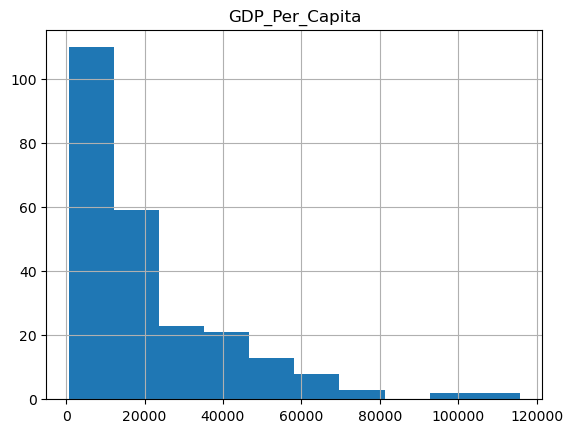

In [80]:
gdp_2021.hist()

<Axes: ylabel='Frequency'>

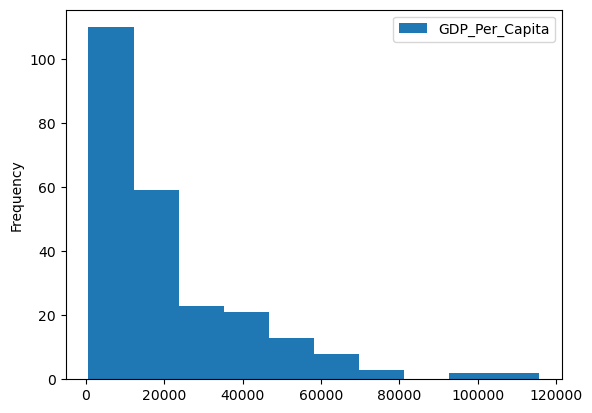

In [169]:
gdp_2021.plot(kind = 'hist')

array([[<Axes: title={'center': 'GDP_Per_Capita'}>]], dtype=object)

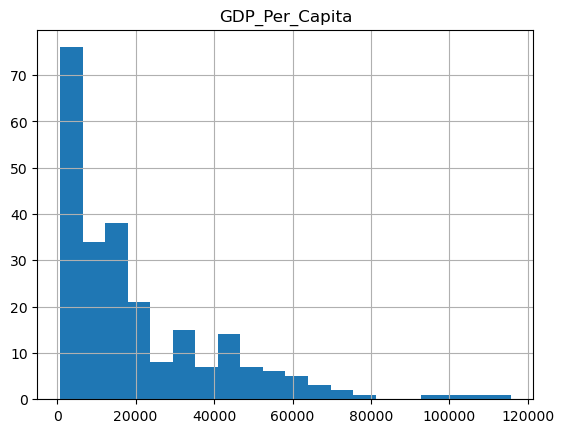

In [81]:
gdp_2021.hist(bins = 20)
# changing bins

array([[<Axes: title={'center': 'GDP_Per_Capita'}>]], dtype=object)

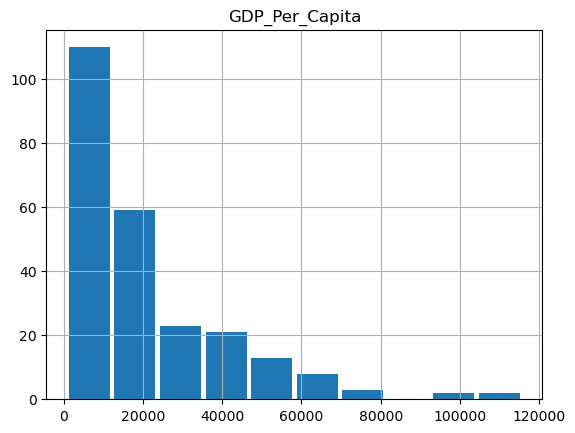

In [82]:
gdp_2021.hist(rwidth = 0.9)
# puts spaces inbetween the columns

array([[<Axes: title={'center': 'GDP_Per_Capita'}>]], dtype=object)

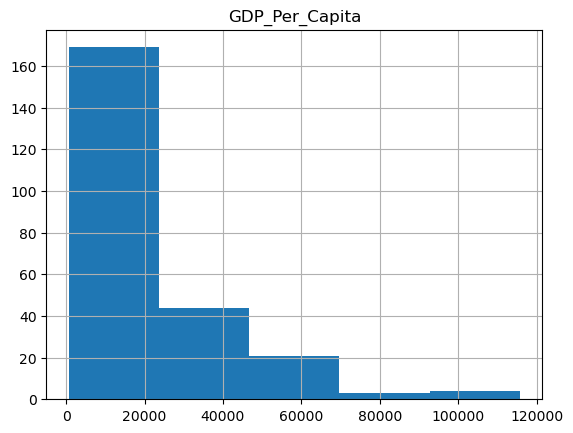

In [83]:
gdp_2021.hist(bins = 5)
# less bins

12. Find the top 5 counties and bottom 5 countries by GDP per capita in 2021.

In [84]:
gdp_2021.sort_values('GDP_Per_Capita').head()

,Country,Year,GDP_Per_Capita
972,Burundi,2021,714.066712
1216,Central African Republic,2021,837.504686
1629,Dem. Rep. Congo,2021,1073.643271
6272,Somalia,2021,1136.735989
5073,Niger,2021,1186.576809


In [85]:
gdp_2021.sort_values('GDP_Per_Capita').tail()

,Country,Year,GDP_Per_Capita
680,Bermuda,2021,78570.489515
5745,Qatar,2021,92862.571798
3278,Ireland,2021,102785.490239
6107,Singapore,2021,107741.118436
4147,Luxembourg,2021,115683.493708


In [86]:
# using a different method 
gdp_2021.nlargest(10, 'GDP_Per_Capita')

,Country,Year,GDP_Per_Capita
4147,Luxembourg,2021,115683.493708
6107,Singapore,2021,107741.118436
3278,Ireland,2021,102785.490239
5745,Qatar,2021,92862.571798
680,Bermuda,2021,78570.489515
6744,Switzerland,2021,70097.368753
7271,United Arab Emirates,2021,69733.793774
1199,Cayman Islands,2021,69400.666661
5205,Norway,2021,65909.003030
4180,"Macao SAR, China",2021,64796.995137


In [87]:
gdp_2021.nsmallest(10, 'GDP_Per_Capita')

,Country,Year,GDP_Per_Capita
972,Burundi,2021,714.066712
1216,Central African Republic,2021,837.504686
1629,Dem. Rep. Congo,2021,1073.643271
6272,Somalia,2021,1136.735989
5073,Niger,2021,1186.576809
4823,Mozambique,2021,1226.766964
3973,Liberia,2021,1423.229589
1282,Chad,2021,1425.494512
4213,Madagascar,2021,1482.376159
4246,Malawi,2021,1491.133688


13. Now, return to the full dataset, `gdp_df`. Pivot the data for 1990 and 2021 (using the pandas `.pivot_table()` method or another method) so that each row corresponds to a country, each column corresponds to a year, and the values in the table give the GDP_Per_Capita amount. Drop any rows that are missing values for either 1990 or 2021. Save the result to a dataframe named `gdp_pivoted`.

In [88]:
gdp_pivoted = gdp_df.pivot_table(index = 'Country', columns = 'Year', values = 'GDP_Per_Capita')
gdp_pivoted = gdp_pivoted.dropna(subset=['2021'])
gdp_pivoted = gdp_pivoted.dropna(subset=['1990'])

In [89]:
gdp_pivoted.head()

Year,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
Country,,,,,,,,,,,,,,,,,,,,,
Africa Eastern and Southern,3037.297466,2955.642238,2823.940366,2737.731240,2715.131116,2764.305017,2838.692029,2886.566235,2867.960243,2873.553735,...,3593.299065,3642.875373,3658.533588,3654.578815,3659.059097,3661.360566,3648.220302,3455.023119,3519.174840,3553.913370
Africa Western and Central,2788.301039,2750.790764,2743.855561,2644.709683,2575.064177,2561.665446,2612.194795,2654.384927,2676.529845,2649.555854,...,4026.231916,4146.994622,4148.547272,4055.943254,4051.271199,4064.079894,4093.442853,3957.933804,4014.607965,4063.857691
Albania,4827.027705,3496.369626,3264.820757,3598.810267,3921.614970,4471.601702,4908.932392,4400.312754,4819.067832,5474.849914,...,11361.252492,11586.817446,11878.437602,12291.842060,12770.991863,13317.119264,13653.182207,13278.369769,14595.944386,15501.662931
Algeria,8828.874473,8517.376962,8471.527605,8109.883559,7869.270272,8013.123442,8195.860480,8147.878198,8435.035658,8584.071496,...,11360.637612,11561.259795,11751.634119,11888.322967,11809.483033,11725.877741,11627.279918,10844.770764,11029.138782,11187.382303
Angola,5793.084512,5659.119330,5158.383835,3799.194899,3728.886199,4149.445734,4557.147774,4728.292342,4790.418610,4739.509639,...,8099.678828,8183.164577,7966.885556,7487.925098,7216.061373,6878.590025,6602.269211,6029.691895,5911.835657,5906.115677


14. Create a new column in `gdp_pivoted` named `Percent_Change`. This column should contain the percent change in GDP_Per_Capita from 1990 to 2021. Hint: Percent change is calculated as 100*(New Value - Old Value) / Old Value.

In [90]:
gdp_pivoted['Percent_Change'] = 100 * ((gdp_pivoted['2021'] - gdp_pivoted['1990'] )/ gdp_pivoted['1990'])

In [91]:
gdp_pivoted.head()
# checking to see if it worked

Year,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,Percent_Change
Country,,,,,,,,,,,,,,,,,,,,,
Africa Eastern and Southern,3037.297466,2955.642238,2823.940366,2737.731240,2715.131116,2764.305017,2838.692029,2886.566235,2867.960243,2873.553735,...,3642.875373,3658.533588,3654.578815,3659.059097,3661.360566,3648.220302,3455.023119,3519.174840,3553.913370,15.865334
Africa Western and Central,2788.301039,2750.790764,2743.855561,2644.709683,2575.064177,2561.665446,2612.194795,2654.384927,2676.529845,2649.555854,...,4146.994622,4148.547272,4055.943254,4051.271199,4064.079894,4093.442853,3957.933804,4014.607965,4063.857691,43.980435
Albania,4827.027705,3496.369626,3264.820757,3598.810267,3921.614970,4471.601702,4908.932392,4400.312754,4819.067832,5474.849914,...,11586.817446,11878.437602,12291.842060,12770.991863,13317.119264,13653.182207,13278.369769,14595.944386,15501.662931,202.379544
Algeria,8828.874473,8517.376962,8471.527605,8109.883559,7869.270272,8013.123442,8195.860480,8147.878198,8435.035658,8584.071496,...,11561.259795,11751.634119,11888.322967,11809.483033,11725.877741,11627.279918,10844.770764,11029.138782,11187.382303,24.921232
Angola,5793.084512,5659.119330,5158.383835,3799.194899,3728.886199,4149.445734,4557.147774,4728.292342,4790.418610,4739.509639,...,8183.164577,7966.885556,7487.925098,7216.061373,6878.590025,6602.269211,6029.691895,5911.835657,5906.115677,2.049878


15. How many countries experienced a negative percent change in GDP per capita from 1990 to 2021?

- 19 countries

In [92]:
gdp_pivoted[gdp_pivoted['Percent_Change'] < 0]

Year,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,Percent_Change
Country,,,,,,,,,,,,,,,,,,,,,
Barbados,14097.395550,13519.721406,12710.419327,12772.787194,12993.923523,13225.754385,13726.032320,14353.120119,14864.666058,14884.601843,...,15441.219761,15789.451218,16156.517559,16198.962160,16003.857426,15954.802665,13805.777541,13754.802423,15106.775175,-2.430187
Brunei,70358.724094,70439.053204,71781.102896,70154.424727,70570.964514,71966.097409,72320.987984,69660.186006,67770.172490,68366.663177,...,63131.186248,62170.087023,59980.988745,60173.051134,59650.231527,61424.364313,61603.550804,60127.023689,58669.900768,-14.542192
Burundi,1175.155086,1209.388158,1190.067435,1153.541309,1103.167298,956.490976,880.309412,867.284265,891.699844,862.006680,...,831.294839,781.579287,764.336602,750.787616,740.448223,729.658463,711.355263,714.066712,708.178317,-39.236385
Central African Republic,1200.613390,1157.381663,1049.119415,1019.441006,1036.283901,1080.770061,1010.743889,1035.107458,1054.312973,1062.298258,...,765.259554,795.037019,818.395995,839.600009,854.647491,861.766789,847.765012,837.504686,819.192343,-30.243599
Congo,5007.319245,4986.699205,4978.350838,4790.461157,4400.020297,4453.430838,4522.008454,4402.408095,4470.347075,4240.155997,...,5319.387249,5009.432267,4363.753925,4073.926085,3786.412000,3695.061694,3384.654335,3234.392972,3210.403567,-35.406695
Dem. Rep. Congo,1750.169739,1550.763705,1346.747222,1128.593145,1034.123387,998.688314,969.808663,900.967796,865.606612,805.277881,...,999.072134,1032.571865,1021.327198,1023.539833,1048.246447,1059.892111,1044.071214,1073.643271,1132.654233,-38.654906
Fragile and conflict affected situations,4864.814075,4350.885189,4111.205699,3783.352920,3333.698724,3152.588947,3105.770527,3149.284983,3218.818872,3245.559989,...,4563.187603,4518.143936,4563.257454,4600.657232,4636.533677,4647.290257,4357.621312,4333.881033,4195.197218,-10.913738
Gabon,17559.006114,18134.816076,17109.401561,17318.162261,17497.649823,17903.782156,18091.047292,18655.653044,18825.361170,16716.372068,...,14785.398669,14892.035790,14783.078117,14478.130305,14254.461697,14478.001722,13903.288955,13814.495200,13949.155147,-21.325301
Guinea-Bissau,1998.173206,2057.174302,2020.741837,1997.076379,1998.836536,2035.223783,2224.748653,2324.843826,1641.030749,1627.075350,...,1690.091136,1748.029233,1811.300971,1872.309281,1851.886546,1890.533103,1803.630591,1831.383229,1855.111973,-8.347123


16. Which country had the highest % change in GDP per capita? Create a line plot showing this country's GDP per capita for all years from 1990 to 2022. Create another showing the country with the second highest % change in GDP. How do the trends in these countries compare?  
**Bonus:** Put both line charts on the same plot.

- highest - Equatorial Guinea 
- 2nd highest - China
- China had a gradual increase over the years and Equarorial Guinea had a pretty significant increase and decrease

In [93]:
gdp_pivoted['Percent_Change'].nlargest(2)

Country
Equatorial Guinea    1463.081870
China                1140.082904
Name: Percent_Change, dtype: float64

In [94]:
gdp_eg = gdp_pivoted.loc['Equatorial Guinea']
gdp_ch = gdp_pivoted.loc['China']

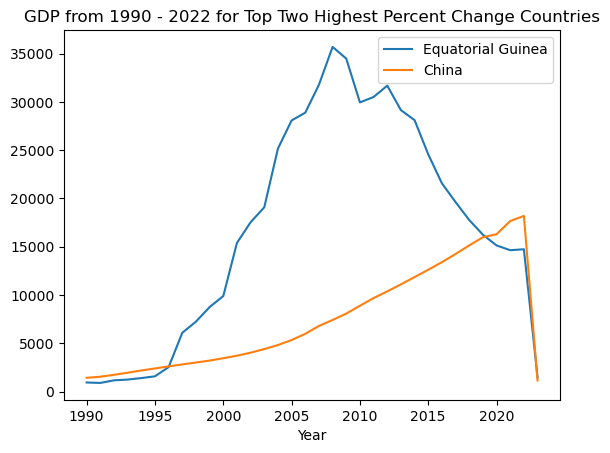

In [95]:
gdp_eg.plot(kind = 'line')
gdp_ch.plot(kind = 'line')
plt.title('GDP from 1990 - 2022 for Top Two Highest Percent Change Countries')
plt.legend()
plt.show()

17. Read in continents.csv contained in the `data` folder into a new dataframe called `continents`. We will be using this dataframe to add a new column to our dataset.

In [97]:
continents = pd.read_csv('../data/continents.csv')
continents.head()

,Continent,Country
0,Asia,Afghanistan
1,Europe,Albania
2,Africa,Algeria
3,Europe,Andorra
4,Africa,Angola


18. Merge gdp_df and continents. Keep only the countries that appear in both data frames. Save the result back to gdp_df.

In [99]:
gdp_df = pd.merge(gdp_df, continents, how = 'inner')
gdp_df.head()

,Country,Year,GDP_Per_Capita,Continent
0,Afghanistan,2021,1517.016266,Asia
1,Afghanistan,2020,1968.341002,Asia
2,Afghanistan,2019,2079.921861,Asia
3,Afghanistan,2018,2060.698973,Asia
4,Afghanistan,2017,2096.093111,Asia


19. Determine the number of countries per continent. Create a bar chart showing this.

In [116]:
gdp_df.groupby('Continent')['Country'].nunique()
# testing to see how this works

Continent
Africa           50
Asia             41
Europe           44
North America    26
Oceania          14
South America    11
Name: Country, dtype: int64

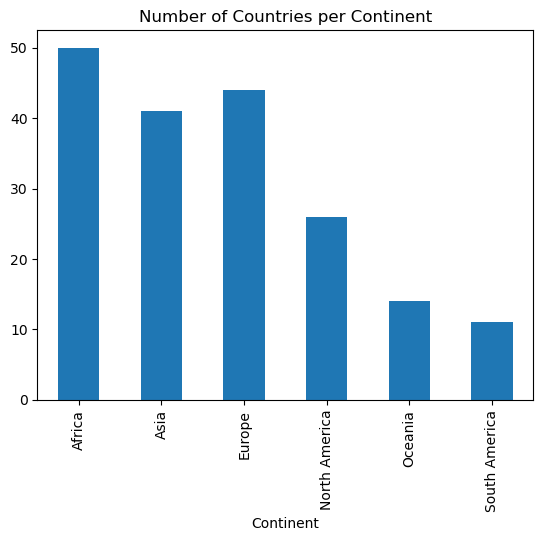

In [118]:
gdp_df.groupby('Continent')['Country'].nunique().plot(kind = 'bar')
plt.title('Number of Countries per Continent')
plt.show()

20. Create a seaborn boxplot showing GDP per capita in 2021 split out by continent. What do you notice?

- South America has no outliers, it seems odd. While Europe has the largest outlier. 
- For Europe and North America the median seems to be in the middle of the box, but does have some skew to the right. 
- Asia, Africa, South America and Oceania are all right skewed. 

In [120]:
gdp_df.head()

,Country,Year,GDP_Per_Capita,Continent
0,Afghanistan,2021,1517.016266,Asia
1,Afghanistan,2020,1968.341002,Asia
2,Afghanistan,2019,2079.921861,Asia
3,Afghanistan,2018,2060.698973,Asia
4,Afghanistan,2017,2096.093111,Asia


In [137]:
# need to get gdp per capita for each continent for 2021 only 
# gdp_df.loc[gdp_df['Year'] == '2021'].groupby('Continent')['GDP_Per_Capita'].sum() #this really didnt work
gdp_df[gdp_df['Year'] == '2021']    


,Country,Year,GDP_Per_Capita,Continent
0,Afghanistan,2021,1517.016266,Asia
21,Albania,2021,14595.944386,Europe
54,Algeria,2021,11029.138782,Africa
87,Angola,2021,5911.835657,Africa
120,Antigua and Barbuda,2021,19899.882425,North America
...,...,...,...,...
5733,Uzbekistan,2021,7800.501501,Asia
5766,Vanuatu,2021,2800.493866,Oceania
5799,West Bank and Gaza,2021,5641.044400,Asia
5828,Zambia,2021,3236.788981,Africa


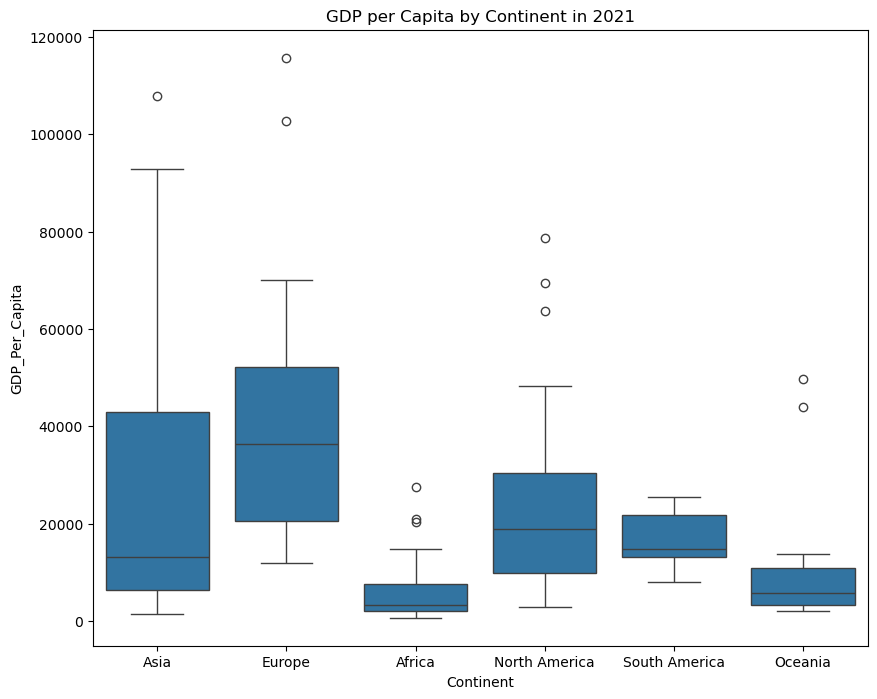

In [154]:
plt.figure(figsize = (10, 8))
sns.boxplot(data = gdp_df[gdp_df['Year'] == '2021'], x= 'Continent', y = 'GDP_Per_Capita')
plt.title('GDP per Capita by Continent in 2021')
plt.show()

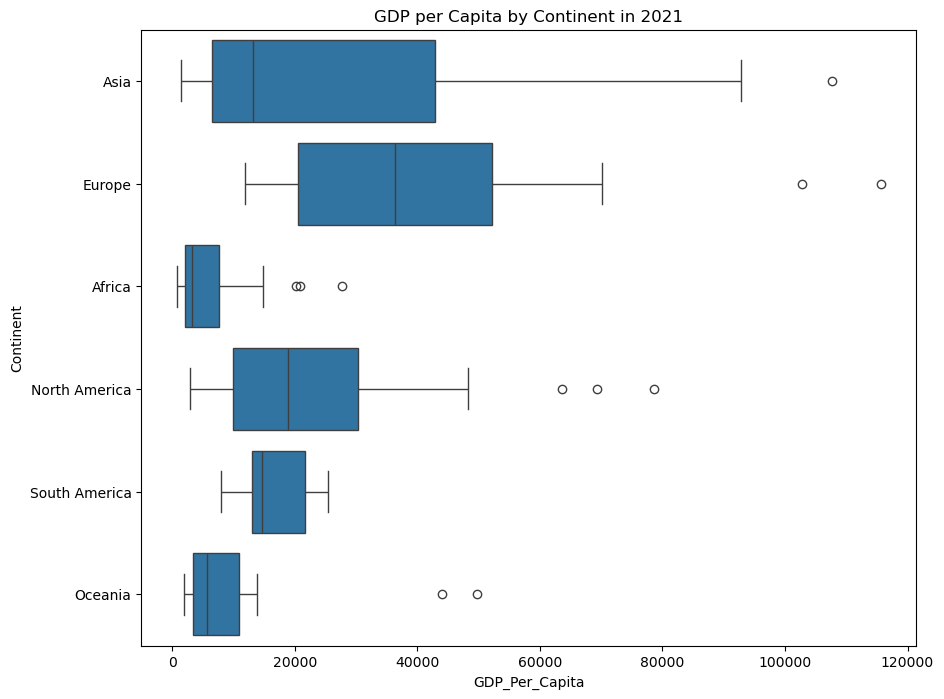

In [155]:
plt.figure(figsize = (10, 8))
sns.boxplot(data = gdp_df[gdp_df['Year'] == '2021'], x = 'GDP_Per_Capita', y = 'Continent')
plt.title('GDP per Capita by Continent in 2021')
plt.show()
# changing azis to see different view 

21. Download the full csv containing Life expectancy at birth, total (years) from [https://data.worldbank.org/indicator/SP.DYN.LE00.IN?name_desc=false](https://data.worldbank.org/indicator/SP.DYN.LE00.IN?name_desc=false). Read this data into a DataFrame named `life_expectancy`. Note: When reading this dataset it, you may encounter an error. Modify your `read_csv` call to correct this **without modifying the original csv file**.

In [173]:
life_expectancy = pd.read_csv('../data/life_exp.csv', header = 2)
life_expectancy.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,Unnamed: 68
0,Aruba,ABW,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,64.152000,64.537000,64.752000,65.132000,65.294000,65.502000,...,75.683000,75.617000,75.903000,76.072000,76.248000,75.723000,74.626000,74.992000,NaN,NaN
1,Africa Eastern and Southern,AFE,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,44.085552,44.386697,44.752182,44.913159,45.479043,45.498338,...,61.856458,62.444050,62.922390,63.365863,63.755678,63.313860,62.454590,62.899031,NaN,NaN
2,Afghanistan,AFG,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,32.535000,33.068000,33.547000,34.016000,34.494000,34.953000,...,62.659000,63.136000,63.016000,63.081000,63.565000,62.575000,61.982000,62.879000,NaN,NaN
3,Africa Western and Central,AFW,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,37.845152,38.164950,38.735102,39.063715,39.335360,39.618038,...,56.195872,56.581678,56.888446,57.189139,57.555796,57.226373,56.988657,57.626176,NaN,NaN
4,Angola,AGO,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,38.211000,37.267000,37.539000,37.824000,38.131000,38.495000,...,60.655000,61.092000,61.680000,62.144000,62.448000,62.261000,61.643000,61.929000,NaN,NaN


22. Drop the Country Code, Indicator Name, and Indicator Code columns. Then use [`.melt()`](https://pandas.pydata.org/docs/reference/api/pandas.melt.html) to convert your data from wide to long. That is, instead of having one row per country and multiple colums per year, we want to have multiple rows per country and a single column for year. After melting, rename the columns to `Country`, `Year`, and `Life_Expectancy`.

In [182]:
life_expectancy = life_expectancy.drop(columns = ['Country Code', 'Indicator Name', 'Indicator Code'])

KeyError: "['Country Code', 'Indicator Name', 'Indicator Code'] not found in axis"

In [183]:
life_expectancy.head()

,Country Name,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,Unnamed: 68
0,Aruba,64.152000,64.537000,64.752000,65.132000,65.294000,65.502000,66.063000,66.439000,66.757000,...,75.683000,75.617000,75.903000,76.072000,76.248000,75.723000,74.626000,74.992000,NaN,NaN
1,Africa Eastern and Southern,44.085552,44.386697,44.752182,44.913159,45.479043,45.498338,45.249105,45.924905,46.223097,...,61.856458,62.444050,62.922390,63.365863,63.755678,63.313860,62.454590,62.899031,NaN,NaN
2,Afghanistan,32.535000,33.068000,33.547000,34.016000,34.494000,34.953000,35.453000,35.924000,36.418000,...,62.659000,63.136000,63.016000,63.081000,63.565000,62.575000,61.982000,62.879000,NaN,NaN
3,Africa Western and Central,37.845152,38.164950,38.735102,39.063715,39.335360,39.618038,39.837827,39.471500,40.085679,...,56.195872,56.581678,56.888446,57.189139,57.555796,57.226373,56.988657,57.626176,NaN,NaN
4,Angola,38.211000,37.267000,37.539000,37.824000,38.131000,38.495000,38.757000,39.092000,39.484000,...,60.655000,61.092000,61.680000,62.144000,62.448000,62.261000,61.643000,61.929000,NaN,NaN


In [186]:
pd.melt(life_expectancy, id_vars = ['Country Name'], var_name = 'Year', value_name = 'Life_Expectancy')

,Country Name,Year,Life_Expectancy
0,Aruba,1960,64.152000
1,Africa Eastern and Southern,1960,44.085552
2,Afghanistan,1960,32.535000
3,Africa Western and Central,1960,37.845152
4,Angola,1960,38.211000
...,...,...,...
17285,Kosovo,Unnamed: 68,NaN
17286,"Yemen, Rep.",Unnamed: 68,NaN
17287,South Africa,Unnamed: 68,NaN
17288,Zambia,Unnamed: 68,NaN


23. What was the first country with a life expectancy to exceed 80?

24. Merge `gdp_df` and `life_expectancy`, keeping all countries and years that appear in both DataFrames. Save the result to a new DataFrame named `gdp_le`. If you get any errors in doing this, read them carefully and correct them. Look at the first five rows of your new data frame to confirm it merged correctly. Also, check the last five rows to make sure the data is clean and as expected.

25. Create a new DataFrame, named `gdp_le_2021` by extracting data for the year 2021 from `gdp_le`. How many countries have a life expectancy of at least 80 in 2021?


26. Find the countries that had the top 3 largest GDP per capita figures for 2021. Create a [seaborn FacetGrid](https://seaborn.pydata.org/generated/seaborn.FacetGrid.html) showing the change in life expectancy over time for these three countries. Each individual figure in the facet grid will represent a single country.

27. Create a scatter plot of Life Expectancy vs GDP per Capita for the year 2021. What do you notice?

28. Find the correlation between Life Expectancy and GDP per Capita for the year 2021. What is the meaning of this number?

29. Add a column to `gdp_le_2021` and calculate the logarithm of GDP per capita. Find the correlation between the log of GDP per capita and life expectancy. How does this compare to the calculation in the previous part? Look at a scatter plot to see if the result of this calculation makes sense.

### Bonus: Solo Exploration:
1. Choose and download another data set from the UN data [http://data.un.org/Explorer.aspx](http://data.un.org/Explorer.aspx) to explore. You may want to combine your new dataset with one or both of the datasets that you already worked with. Report any interesting correlations or trends that you find. 

2.    If time allows, check out the plotly library to add additional interativity to your plots. [https://plotly.com/python/plotly-express/](https://plotly.com/python/plotly-express/).
